In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as stats
from IPython.display import Image, display




In [51]:
df =  pd.read_csv("201902-fordgobike-tripdata.csv")

**Seeing the structure of the data**

In [52]:
df.shape

(183412, 16)

**A brief look into the data**

In [53]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


**Seeing some information about the data**

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

Data Wrangling

In [55]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [56]:
df = df.dropna(axis=0) # removing Nan rows

In [57]:
df.isnull().sum() #Check  the NaN values again

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [58]:


# Convert to datetime object
df['start_time'] = pd.to_datetime(df['start_time'])

# Extract only the date
df['start_date_only'] = df['start_time'].dt.date

# Extract hour and store it in a new column
df['start_hour'] = df['start_time'].dt.hour

# Changing the colomn tyoe
df['start_date_only'] = pd.to_datetime(df['start_date_only'])



In [59]:
# Convert to datetime object
df['end_time'] = pd.to_datetime(df['end_time'])
# Extract only the date
df['end_date_only'] = df['end_time'].dt.date

# Extract hour and store it in a new column
df['end_hour'] = df['end_time'].dt.hour

# Changing the colomn tyoe
df['end_date_only'] = pd.to_datetime(df['end_date_only'])

In [60]:
df.info() #Chck  the data types again

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type            

In [61]:
df["duration_sec"] = df["duration_sec"] / 3600 # changing it imto hours for better understnding
df = df.rename(columns={"duration_sec":"duration_hour"})



In [62]:
df.head(5) #Check  the dataframe

,duration_hour,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date_only,start_hour,end_date_only,end_hour
0,14.495833,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,17,2019-03-01,8
2,17.181667,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,12,2019-03-01,5
3,10.136111,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,17,2019-03-01,4
4,0.440278,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23,2019-03-01,0
5,0.498056,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019-02-28,23,2019-03-01,0


<Axes: ylabel='duration_hour'>

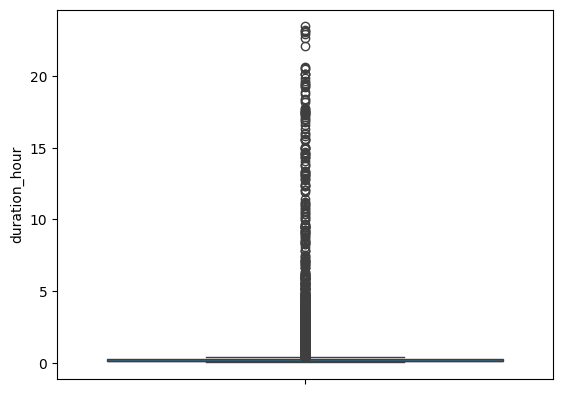

In [63]:
sns.boxplot(df['duration_hour']) #Check some outliers


As expected there are outliers)
data that is extreme to the most of the data so i will delete them

In [64]:
#We will use the quartike method so we can  eliminate the outliers
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['duration_hour'].quantile(0.25)
Q3 = df['duration_hour'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['duration_hour'] >= lower_bound) & (df['duration_hour'] <= upper_bound)]



<Axes: ylabel='duration_hour'>

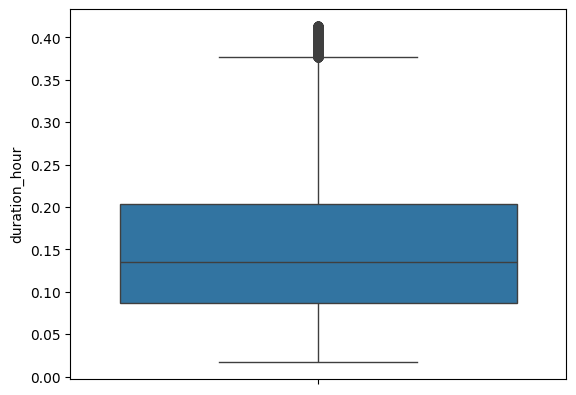

In [65]:
sns.boxplot(df['duration_hour'])


In [66]:
df['age'] = 2019 - df['member_birth_year']


**Data visualization**

**Unvariante Exploration**

**what is the most hour in bike renting ?**

In [67]:
hour_counts = df['start_hour'].value_counts().sort_index()  # Count rentals per month




In [68]:
def plot_label(title, x_label, y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=90)


C:\Users\Ymgen\AppData\Local\Temp\ipykernel_448\1169405313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="viridis")


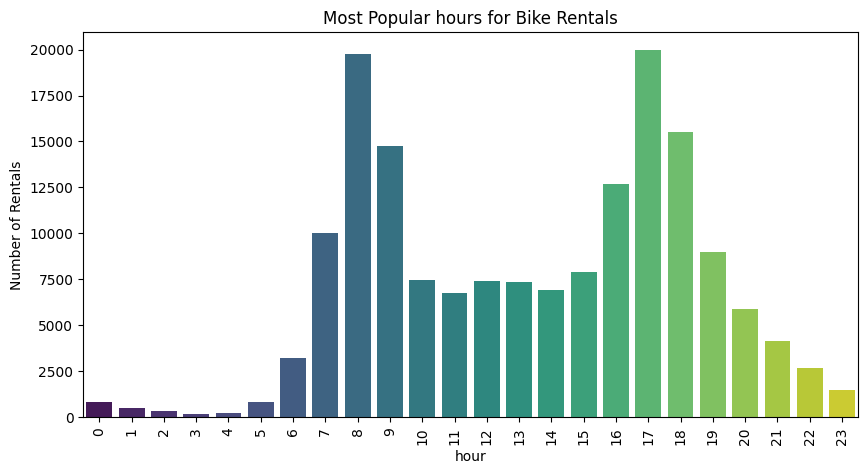

In [69]:

plt.figure(figsize=(10,5))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="viridis")


plot_label("Most Popular hours for Bike Rentals", "hour", "Number of Rentals")
plt.savefig("Most Popular hours for Bike Rentals.png")


Answer : 5 pm is the most popular hour to rent a bike

 **What gender we should target more ?**

In [70]:
gender_counts = df['member_gender'].value_counts().sort_index()  # Count rentals per month
gender_counts

member_gender
Female     38170
Male      124139
Other       3315
Name: count, dtype: int64

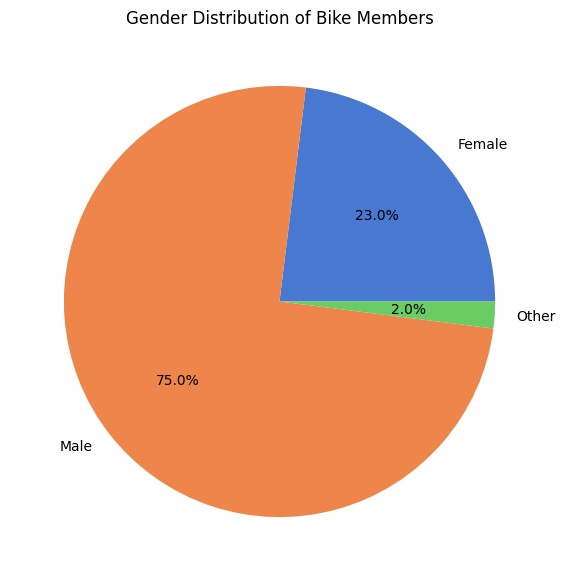

In [71]:
plt.figure(figsize=(7, 7))
colors = sns.color_palette("muted")

plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)

plt.title("Gender Distribution of Bike Members")
plt.savefig("Gender Distribution of Bike Members.png")


Answer : You should target the male audience much more and try to imprive the feamle audience

In [72]:
station_counts = df['end_station_name'].value_counts()  # Count rentals per month
station_counts

end_station_name
San Francisco Caltrain Station 2  (Townsend St at 4th St)    4580
Market St at 10th St                                         3635
Montgomery St BART Station (Market St at 2nd St)             3352
San Francisco Ferry Building (Harry Bridges Plaza)           2918
San Francisco Caltrain (Townsend St at 4th St)               2845
                                                             ... 
Farnam St at Fruitvale Ave                                      5
Parker Ave at McAllister St                                     5
21st Ave at International Blvd                                  5
16th St Depot                                                   4
Willow St at Vine St                                            4
Name: count, Length: 329, dtype: int64

**Distribution of trip duration**

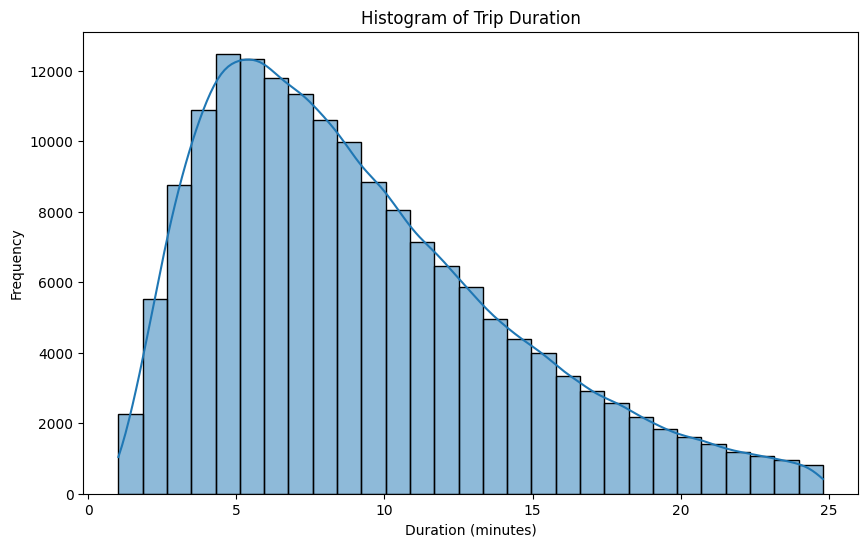

In [73]:

plt.figure(figsize=(10,6))

# Convert duration to minutes
duration_minutes = df["duration_hour"] * 60  

# Use np.linspace for better binning
bins = np.linspace(duration_minutes.min(), duration_minutes.max(), num=30)

sns.histplot(duration_minutes, bins=bins, kde=True)
plt.title("Histogram of Trip Duration")
plt.xlabel("Duration (minutes)")  # Fix the label
plt.ylabel("Frequency")
plt.show()


Possible Explanations:
Short trips dominate due to:
Users relying on the service for quick commutes.
Preference for bikes or other quick transport options for short-distance travel.
Longer trips exist but are uncommon due to:
Some users using the service for leisure or long-distance rides.
Potential data anomalies, such as incorrect trip duration recordings

**I think i will get something useful out of users favourite duration under 60 minute**

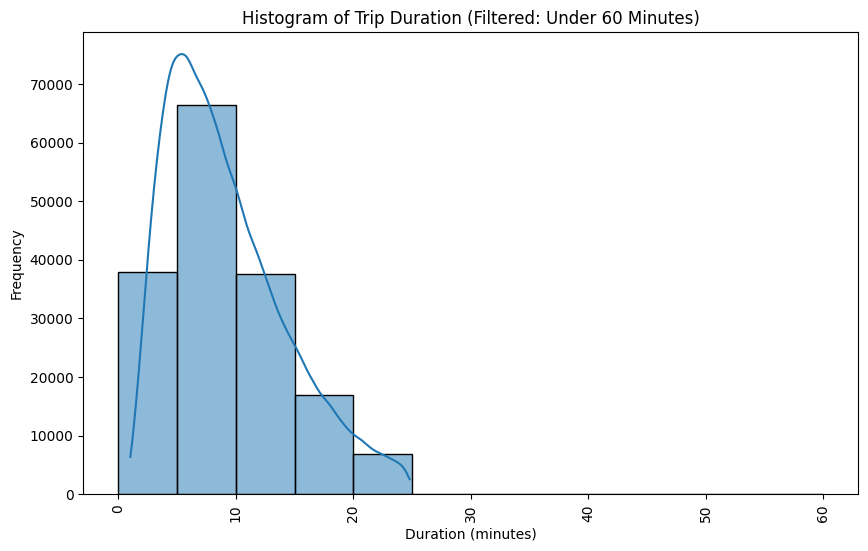

In [74]:

# Filter out trips longer than 60 minutes
filtered_duration = df[df["duration_hour"] * 60 < 60]["duration_hour"] * 60  

plt.figure(figsize=(10,6))

# Define bins (every 5 minutes)
bins = np.arange(0, 61, 5)

# Plot histogram
sns.histplot(filtered_duration, bins=bins, kde=True)
plot_label("Histogram of Trip Duration (Filtered: Under 60 Minutes)", "Duration (minutes)", "Frequency")

plt.savefig("histogram_trip_duration.png", dpi=300, bbox_inches="tight")
plt.show()


Insights : Right-Skewed Distribution 📈

The histogram is highly right-skewed, meaning most bike trips are short, and only a few last longer.
The highest frequency is around 5-10 minutes, indicating that most users take short trips.
Most Trips Are Under 15 Minutes ⏳

A significant portion of trips occur within the 0-15 minute range.
This suggests that bike-sharing is primarily used for short commutes, such as getting to work, school, or nearby locations.

**is there a relation between the ride durarion and the age?**

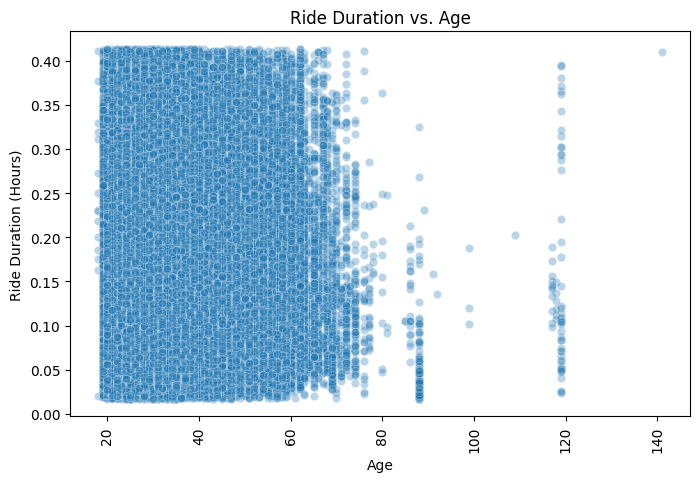

In [75]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='duration_hour', alpha=0.3)
plot_label("Ride Duration vs. Age", "Age", "Ride Duration (Hours)")
plt.savefig("Ride Duration vs. Age.png")


Answer : Majority of Riders are Below 80 Years Old:

Most data points are concentrated between ages 20 and 80.
There are some outliers above 100 years, which might be data entry errors.
No Strong Correlation Between Age and Ride Duration:

Ride durations are spread evenly across all age groups, suggesting age does not strongly impact ride duration.
The distribution is dense below 0.25 hours (15 minutes).
Possible Data Entry Issues for Older Riders:

A few individuals above 100 years old have recorded rides, which is unlikely in real-world scenarios.
These may be due to incorrect age entries in the dataset.

**Bivariante Exploration**

**Further investigation of how age affects the  ride duration?**

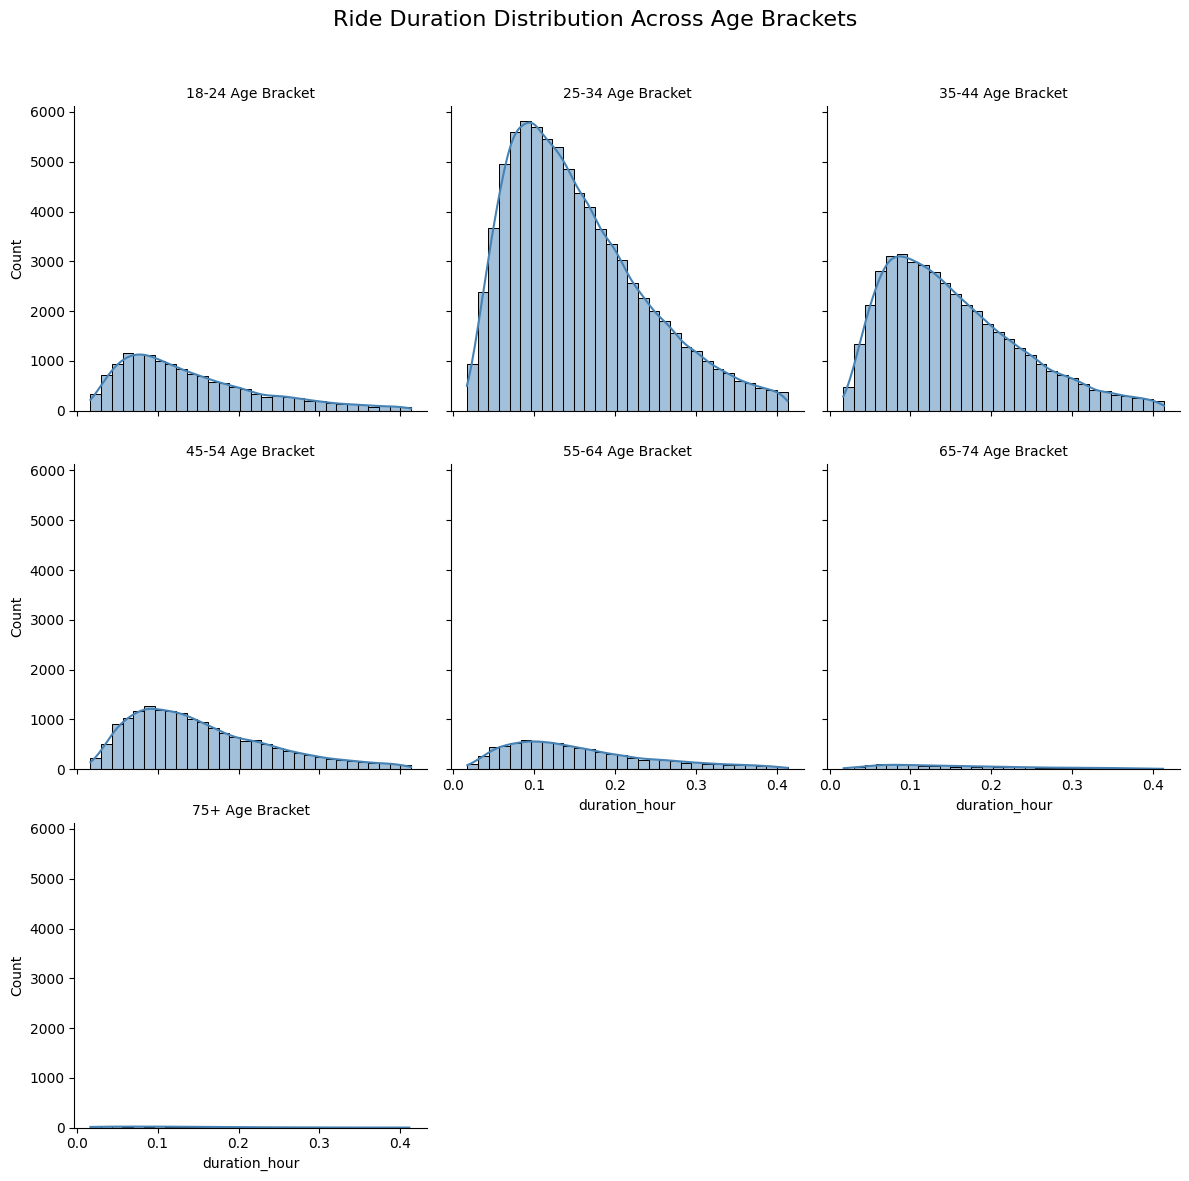

In [76]:

# Define age brackets
bins = [18, 24, 34, 44, 54, 64, 74, 100]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]

df['age_bracket'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Remove extreme outliers for better visualization
df = df[df['duration_hour'] < 1]  # Filtering durations under 1 hour

# Plot histogram
g = sns.FacetGrid(df, col="age_bracket", col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="duration_hour", bins=30, kde=True, color="steelblue")

g.set_titles(col_template="{col_name} Age Bracket")
g.fig.suptitle("Ride Duration Distribution Across Age Brackets", fontsize=16)
g.fig.subplots_adjust(top=0.90)  

plt.savefig("Ride Duration Distribution Across Age Brackets.png")


Answer : Customers Take Longer Rides than Subscribers
Customers have higher median ride durations than Subscribers at all hours.
This suggests that Customers (likely tourists or occasional riders) use bikes for leisure, while Subscribers (commuters) take shorter trips.

Commuting Patterns for Subscribers
Subscribers have lower ride durations in the early morning and evening, aligning with work commutes.
Customers don’t show a similar commuting pattern, supporting the idea that they use bikes for leisure.

**How  gender affects the ride duration?**

**How the type of the user affects the ride duration?**

C:\Users\Ymgen\AppData\Local\Temp\ipykernel_448\112713446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='member_gender', y='duration_hour', palette="coolwarm")


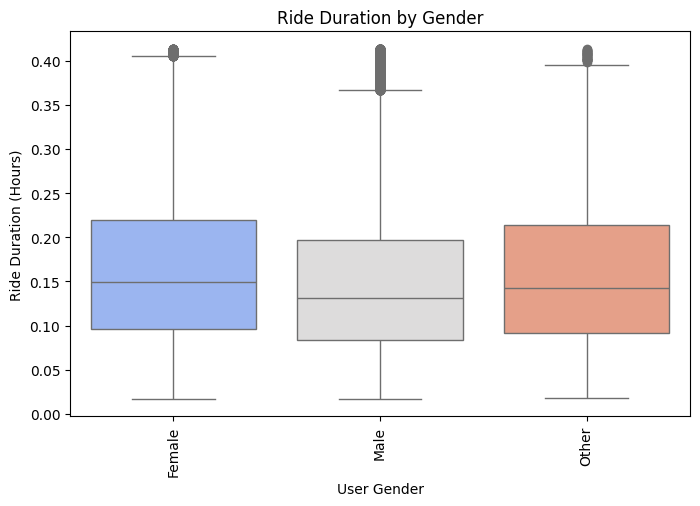

In [77]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='member_gender', y='duration_hour', palette="coolwarm")
plot_label("Ride Duration by Gender", "User Gender", "Ride Duration (Hours)")


plt.savefig("Ride Duration by Gender.png")


Answer : Most ride durations are below 0.25 hours (~15 minutes).
The presence of outliers suggests that some individuals took much longer rides, but these are exceptions.
No significant difference in ride duration between genders, meaning gender does not strongly influence ride duration in this dataset.

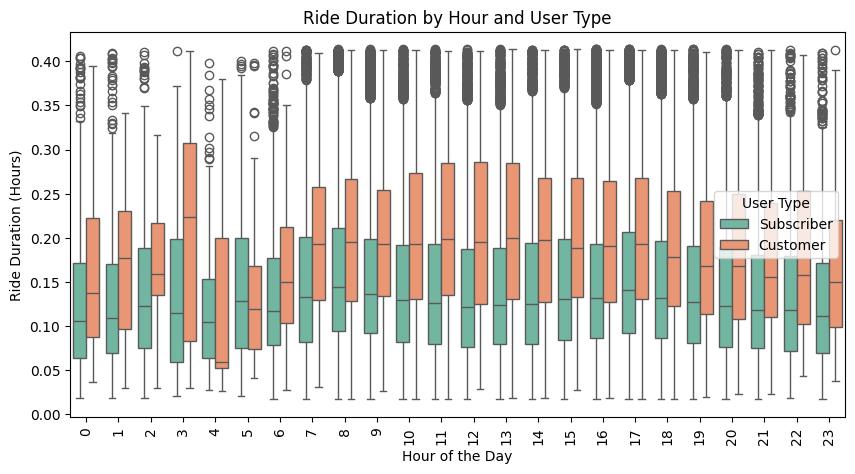

In [78]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='start_hour', y='duration_hour', hue='user_type', palette="Set2")
plot_label("Ride Duration by Hour and User Type", "Hour of the Day", "Ride Duration (Hours)")
plt.legend(title="User Type")
plt.savefig("Ride Duration by Hour and User Type.png")


Answer : Customers Take Longer Rides than Subscribers
Customers have higher median ride durations than Subscribers at all hours.
This suggests that Customers (likely tourists or occasional riders) use bikes for leisure, while Subscribers (commuters) take shorter trips.

Commuting Patterns for Subscribers
Subscribers have lower ride durations in the early morning and evening, aligning with work commutes.
Customers don’t show a similar commuting pattern, supporting the idea that they use bikes for leisure.

**Number of trips between stations**


pivot_table = df.pivot_table(index="start_station_id", columns="end_station_id", values="bike_id", aggfunc="count")
plt.subplot(3, 1, 1)
sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Trips Between Stations")

**In the previous heatmap, we had too many stations, leading to a sparse, unreadable visualization.**

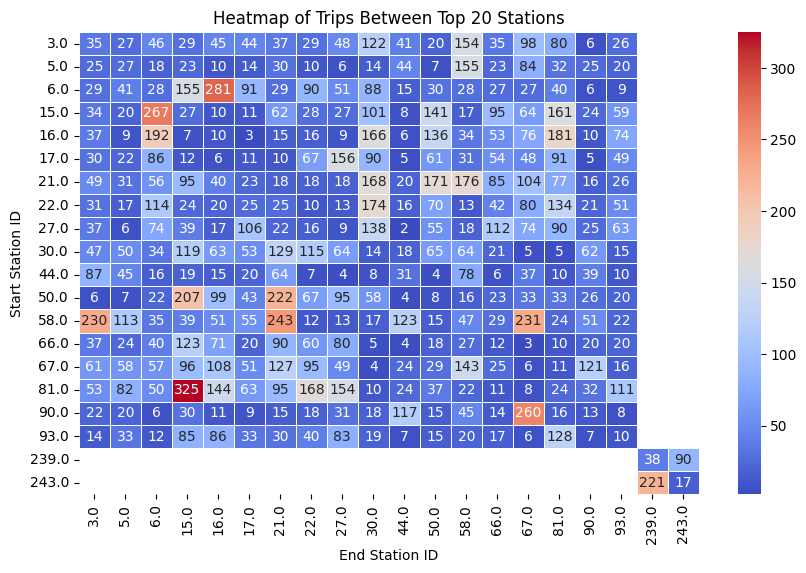

In [79]:
# Find top 20 busiest stations
top_stations = df["start_station_id"].value_counts().head(20).index

# Filter data for only those stations
filtered_df = df[df["start_station_id"].isin(top_stations) & df["end_station_id"].isin(top_stations)]

# Create pivot table again
pivot_table_filtered = filtered_df.pivot_table(index="start_station_id", columns="end_station_id", values="bike_id", aggfunc="count")

# Plot new heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_filtered, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")  # Adding annotations for better readability
plt.title("Heatmap of Trips Between Top 20 Stations")
plot_label("Heatmap of Trips Between Top 20 Stations", "End Station ID", "Start Station ID")

# Save & Show
plt.savefig("heatmap_top20_stations.png", dpi=300, bbox_inches="tight")
plt.show()


**Answer : The highest trip counts are in red and light blue, indicating the busiest station-to-station routes.
Example: The trips between stations 6 & 15, 50 & 58, and 81 & 58 appear frequently (trip counts over 200+).
This suggests that these stations are major hubs with a lot of trips between them.**

**Number of trips by user type and gender**


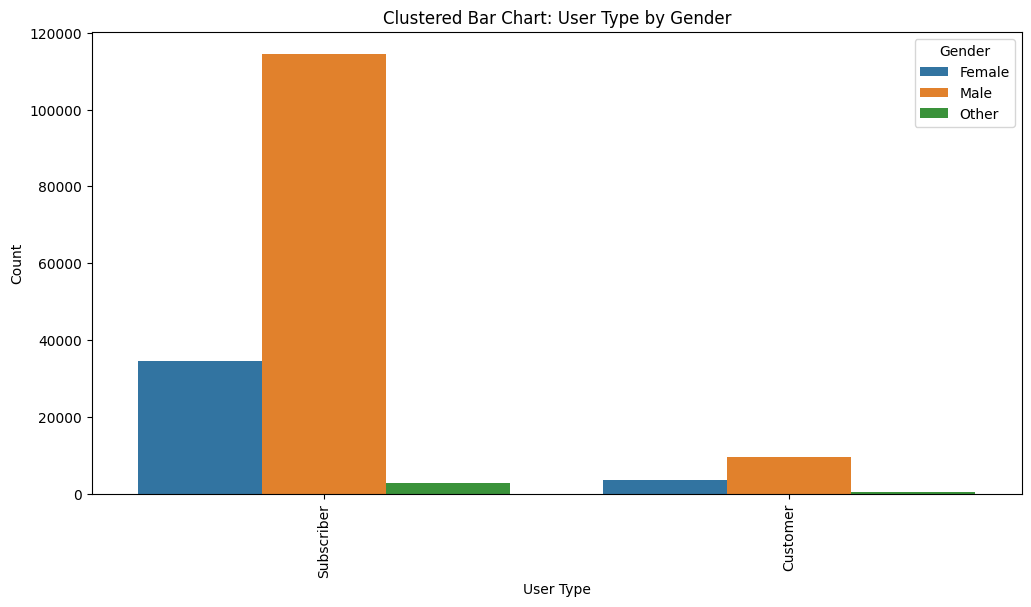

In [80]:
plt.figure(figsize=(12, 6))  
sns.countplot(data=df, x="user_type", hue="member_gender")
plot_label("Clustered Bar Chart: User Type by Gender", "User Type", "Count")
plt.savefig("bar_chart_user_type_gender.png", dpi=300, bbox_inches="tight")
plt.legend(title="Gender", loc="upper right")  # Move legend to a better spot
plt.show()


Answer : Subscribers Dominate the User Base

The vast majority of users are Subscribers, while the Customer category is very small.
This suggests that most users prefer long-term memberships rather than one-time rides.
Gender Distribution Among Subscribers vs. Customers

Male users dominate the Subscriber category (largest blue bar).
Female users are significantly fewer but still make up a noticeable portion.
The "Other" gender category has very few users in both groups.

**multivariante ditribution**

**Finding possible correlation between age, duration hour, starthour**

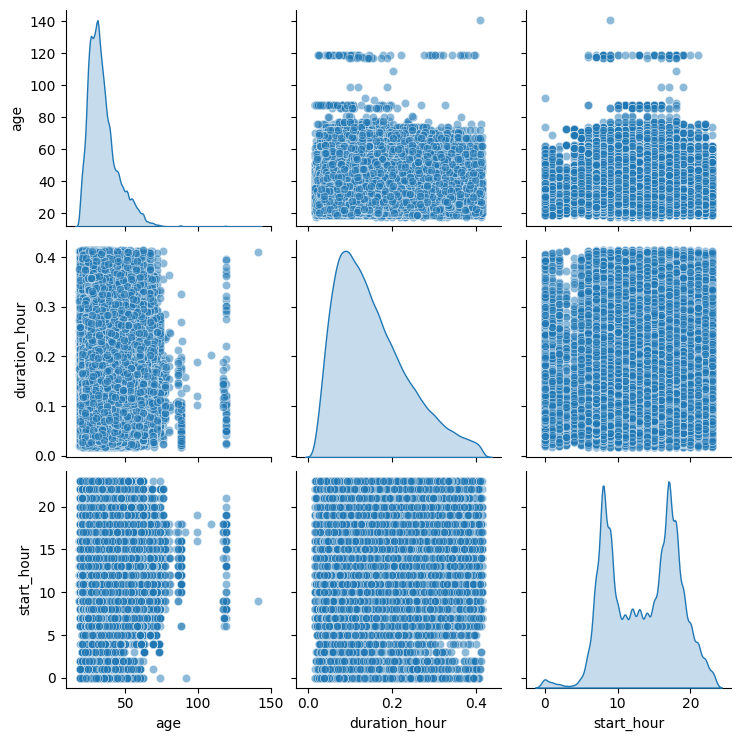

In [81]:
sns.pairplot(df[['age', 'duration_hour', 'start_hour']], diag_kind='kde',plot_kws={'alpha': 0.5})
plt.savefig("age_durationhour_starthour.png")

Answer : Age Distribution is Right-Skewed (Top Left Plot)
Most riders are young (20-40 years old), with fewer older riders.
A few extreme outliers (age 100+) may indicate incorrect or missing data.
    
Start Hour Shows a Bimodal Distribution (Bottom Right Plot)
Two peaks appear around 8 AM and 5-6 PM, likely reflecting commuting hours.
This supports the idea that many users rent bikes for work commutes.
